In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [3]:
data=pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
data.experience = data.experience.fillna('zero')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
score_mean = data['test_score(out of 10)'].mean()
score_mean

7.857142857142857

In [6]:
import math
score_mean = math.floor(score_mean)
score_mean

7

In [47]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(score_mean)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [48]:
from word2number import w2n

In [49]:
data.experience=data.experience.apply(w2n.word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [50]:
x=data.drop('salary($)',axis=1)
y=data['salary($)']

In [51]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [36]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [52]:
model=DecisionTreeRegressor()  
model.fit(x,y)

DecisionTreeRegressor()

In [53]:
model.score(x,y)

1.0

In [54]:
from sklearn import tree

In [55]:
print(tree.export_text(model))

|--- feature_0 <= 1.00
|   |--- feature_2 <= 7.50
|   |   |--- value: [45000.00]
|   |--- feature_2 >  7.50
|   |   |--- value: [50000.00]
|--- feature_0 >  1.00
|   |--- feature_0 <= 6.00
|   |   |--- feature_1 <= 8.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- value: [62000.00]
|   |   |--- feature_1 >  8.50
|   |   |   |--- value: [65000.00]
|   |--- feature_0 >  6.00
|   |   |--- feature_0 <= 10.50
|   |   |   |--- feature_2 <= 6.50
|   |   |   |   |--- value: [70000.00]
|   |   |   |--- feature_2 >  6.50
|   |   |   |   |--- value: [72000.00]
|   |   |--- feature_0 >  10.50
|   |   |   |--- value: [80000.00]



[Text(0.4090909090909091, 0.9, 'experience <= 1.0\nsquared_error = 115750000.0\nsamples = 8\nvalue = 63000.0'),
 Text(0.18181818181818182, 0.7, 'interview_score(out of 10) <= 7.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.09090909090909091, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.2727272727272727, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.6363636363636364, 0.7, 'experience <= 6.0\nsquared_error = 45472222.222\nsamples = 6\nvalue = 68166.667'),
 Text(0.45454545454545453, 0.5, 'test_score(out of 10) <= 8.5\nsquared_error = 4222222.222\nsamples = 3\nvalue = 62333.333'),
 Text(0.36363636363636365, 0.3, 'interview_score(out of 10) <= 8.5\nsquared_error = 1000000.0\nsamples = 2\nvalue = 61000.0'),
 Text(0.2727272727272727, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.45454545454545453, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 62000.0'),
 Text(0.5454545454545454, 0.3, 'squared_error = 0.0

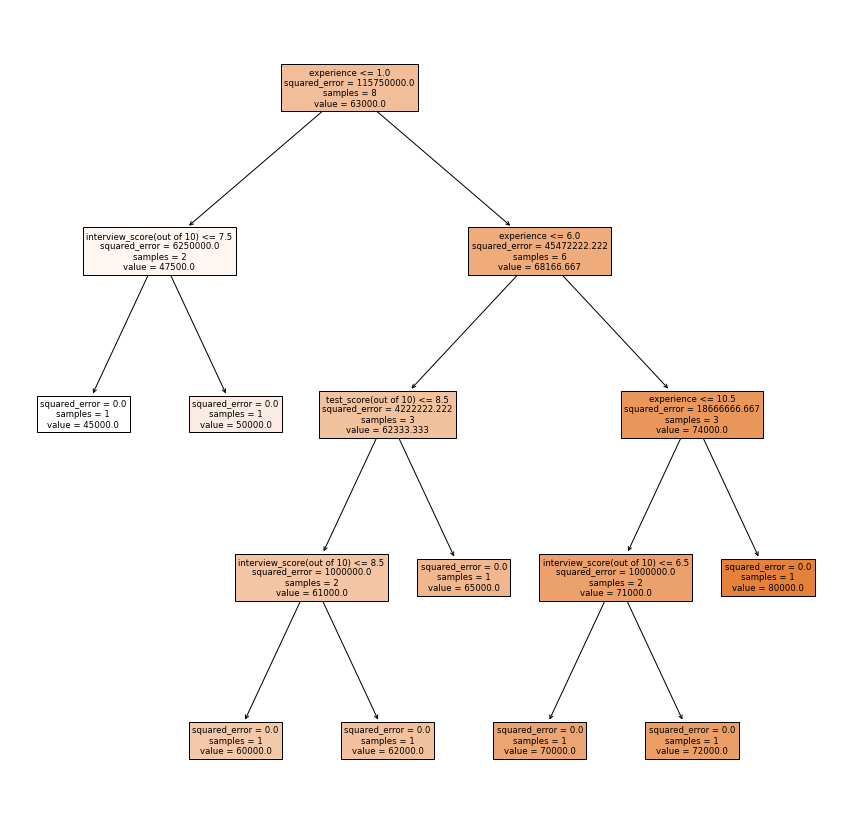

In [56]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=x.columns, class_names='salary($)', filled=True)